In [154]:
# pip install missingno==0.4.1 

In [322]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import warnings

from scipy.stats import skew
from scipy.stats import norm
from scipy import stats
import seaborn as sns
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')
%matplotlib inline


In [323]:
# load original data into dataframe
df_train = pd.read_csv('train_dataset.csv')
df_test = pd.read_csv('test_dataset.csv')

df_train['IsTrain']=1
df_test['IsTrain']=0

In [324]:
#load the initial data file:
df = pd.concat([df_train, df_test], axis=0)
df.index = list(range(len(df)))

In [325]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101766 entries, 0 to 101765
Data columns (total 51 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,IsTrain
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607,0.899996
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600,0.300007
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,1.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,1.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,1.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,1.000000


In [326]:
# exploring unique values in each column
for col in df.columns:
    print(col, df[col].unique())

encounter_id [  7733208 152449578 440311646 ...  99161748 167893722 275433000]
patient_nbr [  3291489  84529188 121372727 ...  80880120  45313173  64278423]
race ['Caucasian' 'AfricanAmerican' '?' 'Asian' 'Other' 'Hispanic']
gender ['Female' 'Male' 'Unknown/Invalid']
age ['[60-70)' '[40-50)' '[80-90)' '[70-80)' '[50-60)' '[20-30)' '[90-100)'
 '[30-40)' '[0-10)' '[10-20)']
weight ['?' '[75-100)' '[125-150)' '[25-50)' '[100-125)' '[50-75)' '[0-25)'
 '[175-200)' '[150-175)' '>200']
admission_type_id [1 5 3 2 8 6 7 4]
discharge_disposition_id [ 1  2  3  4 22  6 14  7 18 11  5 25 13 23 15  8 16 17 10 28 27 24 19 12
  9 20]
admission_source_id [ 7 17  1  6  4  2  5 20  3  9 10  8 22 11 25 14 13]
time_in_hospital [ 2  3 13  4  5  6 14 10  7 12  8  1 11  9]
payer_code ['?' 'HM' 'MC' 'CP' 'SP' 'UN' 'BC' 'MD' 'OG' 'CM' 'PO' 'CH' 'DM' 'OT' 'WC'
 'SI' 'MP' 'FR']
medical_specialty ['Cardiology' '?' 'Orthopedics-Reconstructive' 'Surgery-Thoracic'
 'Family/GeneralPractice' 'InternalMedicine' 'Emergen

In [327]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,IsTrain
0,7733208,3291489,Caucasian,Female,[60-70),?,1,1,7,2,...,No,No,No,No,No,No,No,No,NO,1
1,152449578,84529188,Caucasian,Male,[40-50),?,1,2,7,3,...,No,No,No,No,No,No,No,No,NO,1
2,440311646,121372727,Caucasian,Male,[40-50),?,1,3,7,13,...,Down,No,No,No,No,No,Ch,Yes,NO,1
3,106684962,24066279,Caucasian,Female,[80-90),?,5,3,17,4,...,Steady,No,No,No,No,No,Ch,Yes,NO,1
4,139779162,86645961,AfricanAmerican,Male,[60-70),?,1,4,1,3,...,Steady,No,No,No,No,No,Ch,Yes,>30,1


In [328]:
# make a copy of the dataframe for preprocessing
df_copy= df.copy(deep=True)

## 1) Investigate dataset

##### 1.1)  Column Type

In [329]:
categoricals = ['race', 'gender', 'age', 'weight','admission_type_id', 'discharge_disposition_id',
               'admission_source_id', 'payer_code', 'medical_specialty', 'max_glu_serum', 'A1Cresult','metformin', 'repaglinide',
               'nateglinide', 'chlorpropamide','glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide','pioglitazone',
               'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone','tolazamide', 'examide', 'citoglipton', 'insulin',
               'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone',
               'change', 'diabetesMed', 'readmitted','diag_1','diag_2', 'diag_3','IsTrain']
numericals =   ['encounter_id','patient_nbr','time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications','number_outpatient', 'number_emergency', 
               'number_inpatient', 'number_diagnoses']



print(len(categoricals)+len(numericals))

51


In [330]:
# Change Columns into nurical / categorical
df[numericals] = df[numericals].apply(pd.to_numeric) 
df[categoricals]=df[categoricals].astype(str)

      Remarks: No missing data in numerical columns

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101766 entries, 0 to 101765
Data columns (total 51 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null object
discharge_disposition_id    101766 non-null object
admission_source_id         101766 non-null object
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10

In [332]:
df.describe()

,encounter_id,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


#### 1.2) Missing Values

In [333]:
# ## train set
# for col in df_train.columns:
#     if df [col].dtypes == object:
#          print(col,df[col][df[col] == '?'].count())
# # gender was coded differently so we use a custom count for this one
# print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())

In [334]:
# Convert '?' into 'na'
df= df.replace(['?','Unknown/Invalid'],np.nan)
df_test= df_test.replace(['?','Unknown/Invalid'],np.nan)


In [335]:
df.isna().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          3
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

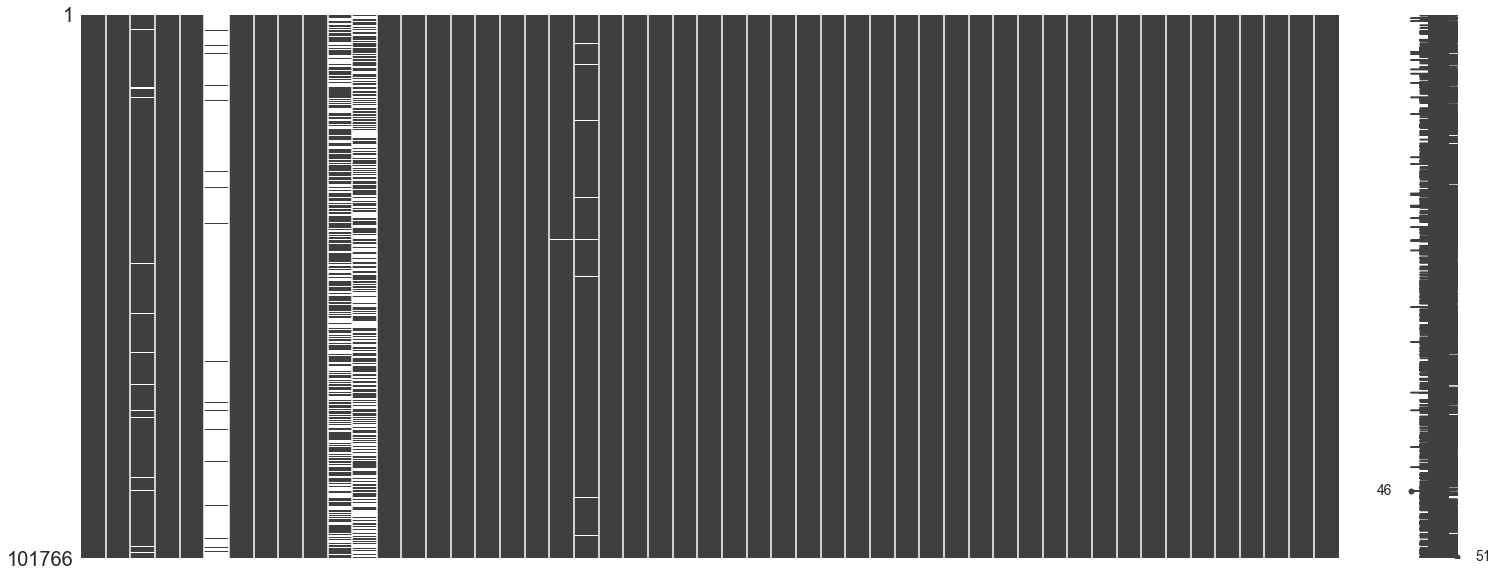

In [336]:
msno.matrix(df)

## 2) Dropping Columns/Rows

#### 2.1) Drop Columns


- Drop 'weight' => too many missing data
- Drop 'examide' and 'citoglipton' => Only "No" in the columns

In [337]:
df=df.drop(['weight','examide','citoglipton'],axis=1)
print(df.shape)

(101766, 48)


#### 2.2) Drop Rows

- Drop rows on 'discharge_disposition_id' =11 (Expire) : The patient passed away --> No way to come back.

In [338]:
df=df[df.discharge_disposition_id!= '11']
print(df.shape)

(100124, 48)


## 3.) Imputation

#### 3) Impute all missing values with "None"

In [339]:
df=df.replace(np.nan, -99)
df.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitaz

## 4) Data Cleaning

#### 4.1) Cleaning the 'age'  by stripping '  [  ' & '  )  ' out of the column

In [340]:
df['age'] = df['age'].str.strip('[)')

## 5.) Grouping

In [341]:
# exploring unique values in each column
for col in df.columns:
    print(col, df[col].unique())

encounter_id [  7733208 152449578 440311646 ...  99161748 167893722 275433000]
patient_nbr [  3291489  84529188 121372727 ...  80880120  45313173  64278423]
race ['Caucasian' 'AfricanAmerican' -99 'Asian' 'Other' 'Hispanic']
gender ['Female' 'Male' -99]
age ['60-70' '40-50' '80-90' '70-80' '50-60' '20-30' '90-100' '30-40' '0-10'
 '10-20']
admission_type_id ['1' '5' '3' '2' '8' '6' '7' '4']
discharge_disposition_id ['1' '2' '3' '4' '22' '6' '14' '7' '18' '5' '25' '13' '23' '15' '8' '16'
 '17' '10' '28' '27' '24' '19' '12' '9' '20']
admission_source_id ['7' '17' '1' '6' '4' '2' '5' '20' '3' '9' '10' '8' '22' '11' '25' '14'
 '13']
time_in_hospital [ 2  3 13  4  5  6 14 10  7 12  8  1 11  9]
payer_code [-99 'HM' 'MC' 'CP' 'SP' 'UN' 'BC' 'MD' 'OG' 'CM' 'PO' 'CH' 'DM' 'OT' 'WC'
 'SI' 'MP' 'FR']
medical_specialty ['Cardiology' -99 'Orthopedics-Reconstructive' 'Surgery-Thoracic'
 'Family/GeneralPractice' 'InternalMedicine' 'Emergency/Trauma'
 'Orthopedics' 'Surgery-Vascular' 'Radiologist' 'Nep

- 'gender' = Grouping Male=1: Female=0 : None= -99

In [342]:
#Train_set
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)
df['gender'] = df['gender'].astype(int)

In [343]:
df.age.value_counts()

70-80     25566
60-70     22188
50-60     17102
80-90     16708
40-50      9626
30-40      3765
90-100     2669
20-30      1650
10-20       690
0-10        160
Name: age, dtype: int64

In [344]:
#train_Set
df['age'] = df['age'].replace('0-10', 5)
df['age'] = df['age'].replace('10-20',15)
df['age'] = df['age'].replace('20-30',25)
df['age'] = df['age'].replace('30-40',35)
df['age'] = df['age'].replace('40-50',45)
df['age'] = df['age'].replace('50-60',55)
df['age'] = df['age'].replace('60-70',65)
df['age'] = df['age'].replace('70-80',75)
df['age'] = df['age'].replace('80-90',85)
df['age'] = df['age'].replace('90-100',95)
df['age'] = df['age'].astype(int)


- 'admission_type_id' = Groupping Category [ 1,2,7 to 1] and [5,6,8 to 5]

In [345]:
# Train Set
df['admission_type_id'] = df['admission_type_id'].replace(2,1)
df['admission_type_id'] = df['admission_type_id'].replace(7,1)
df['admission_type_id'] = df['admission_type_id'].replace(6,5)
df['admission_type_id'] = df['admission_type_id'].replace(8,5)
df['admission_type_id'] = df['admission_type_id'].astype(int)

- 'discharge_disposition_id' = Groupping Category [ 1,2,3,4,5,6,8,10,15,16,17,22,23,24,27,28,29,30 to 1 = Discharge/Transfer], [13,14 to 13 = hospice], [ 18,25,26 to 18 = No data],[19,20,21 to 19 = expire]and **[7: no change = ledt AMA, ], **[12 : no change = expect to return],[**9: no change = admit as an inpatient]

In [346]:
## Train_Set
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(['1','2','3','4','5','6','8','10','15','16','17','22','23','24','27','28','29','30'],'1')
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(['13','14'],'13')
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(['18','25','26'],'18')
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(['19','20','21'],'19')
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype(int)

- 'admission_source_id' =Groupping Catergory [1,2,3 to 1 = Referal],[4,5,6,10,22,25,26 to 4 = transfer],[11,12 to 11 = Delivery], [13,14 to 13 = baby admission],[9,15,17,20,21 to 9 = no data] and **[7= no change = emergency], **[8 =no change=court],[19 = no change = readmission]

In [347]:
## Train_set
df['admission_source_id'] = df['admission_source_id'].replace(['1','2','3'],'1')
df['admission_source_id'] = df['admission_source_id'].replace(['4','5','6','10','22','25','26'],'4')
df['admission_source_id'] = df['admission_source_id'].replace(['11','12'],'11')
df['admission_source_id'] = df['admission_source_id'].replace(['13','14'],'13')
df['admission_source_id'] = df['admission_source_id'].replace(['9','15','17','20','21'],'9')
df['admission_source_id'] = df['admission_source_id'].astype(int)

- 'A1Cresult' : Group >7 & <8 = 1 : Norm = 0 [ No effect] : None = -999 [ No Data]


- 'max_glu_serum' : Group >200 &>300 = 1 : Norm = 0 [ No effect] : None = -999 [ No Data]

In [348]:
#Train_set
df['A1Cresult'] = df['A1Cresult'].replace('>7', 1)
df['A1Cresult'] = df['A1Cresult'].replace('>8', 1)
df['A1Cresult'] = df['A1Cresult'].replace('Norm', 0)
df['A1Cresult'] = df['A1Cresult'].replace('None', -99)
df['A1Cresult'] = df['A1Cresult'].astype(int)

df['max_glu_serum'] = df['max_glu_serum'].replace('>200', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('>300', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 0)
df['max_glu_serum'] = df['max_glu_serum'].replace('None', -99)
df['max_glu_serum'] = df['max_glu_serum'].astype(int)

In [349]:
#inspect df
print(df['A1Cresult'].value_counts())
print(df['max_glu_serum'].value_counts())

-99    83247
 1     11935
 0      4942
Name: A1Cresult, dtype: int64
-99    94899
 1      2651
 0      2574
Name: max_glu_serum, dtype: int64


In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100124 entries, 0 to 101765
Data columns (total 48 columns):
encounter_id                100124 non-null int64
patient_nbr                 100124 non-null int64
race                        100124 non-null object
gender                      100124 non-null int32
age                         100124 non-null int32
admission_type_id           100124 non-null int32
discharge_disposition_id    100124 non-null int32
admission_source_id         100124 non-null int32
time_in_hospital            100124 non-null int64
payer_code                  100124 non-null object
medical_specialty           100124 non-null object
num_lab_procedures          100124 non-null int64
num_procedures              100124 non-null int64
num_medications             100124 non-null int64
number_outpatient           100124 non-null int64
number_emergency            100124 non-null int64
number_inpatient            100124 non-null int64
diag_1                      100124 n

- 'diag_1'

In [351]:
# disease codes starting with V or E are in “other” category; so recode them to 0
df.loc[df['diag_1'].str.contains('V', na=False), ['diag_1']] = 0
df.loc[df['diag_1'].str.contains('E', na=False), ['diag_1']] = 0

# convert this variable to float type to enable computations later
df['diag_1'] = df['diag_1'].astype(float)

# iterate and recode disease codes between certain ranges to certain categories
for index, row in df.iterrows():
    if (row['diag_1'] >= 390 and row['diag_1'] < 460) or (np.floor(row['diag_1']) == 785):
        df.loc[index, 'diag_1'] = 1
    elif (row['diag_1'] >= 460 and row['diag_1'] < 520) or (np.floor(row['diag_1']) == 786):
        df.loc[index, 'diag_1'] = 2
    elif (row['diag_1'] >= 520 and row['diag_1'] < 580) or (np.floor(row['diag_1']) == 787):
        df.loc[index, 'diag_1'] = 3
    elif (np.floor(row['diag_1']) == 250):
        df.loc[index, 'diag_1'] = 4
    elif (row['diag_1'] >= 800 and row['diag_1'] < 1000):
        df.loc[index, 'diag_1'] = 5
    elif (row['diag_1'] >= 710 and row['diag_1'] < 740):
        df.loc[index, 'diag_1'] = 6
    elif (row['diag_1'] >= 580 and row['diag_1'] < 630) or (np.floor(row['diag_1']) == 788):
        df.loc[index, 'diag_1'] = 7
    elif (row['diag_1'] >= 140 and row['diag_1'] < 240):
        df.loc[index, 'diag_1'] = 8
    else:
        df.loc[index, 'diag_1'] = 0

- diag_2

In [352]:
# disease codes starting with V or E are in “other” category; so recode them to 0
df.loc[df['diag_2'].str.contains('V', na=False), ['diag_2']] = 0
df.loc[df['diag_2'].str.contains('E', na=False), ['diag_2']] = 0

# convert this variable to float type to enable computations later
df['diag_2'] = df['diag_2'].astype(float)

# iterate and recode disease codes between certain ranges to certain categories
for index, row in df.iterrows():
    if (row['diag_2'] >= 390 and row['diag_2'] < 460) or (np.floor(row['diag_2']) == 785):
        df.loc[index, 'diag_2'] = 1
    elif (row['diag_2'] >= 460 and row['diag_2'] < 520) or (np.floor(row['diag_2']) == 786):
        df.loc[index, 'diag_2'] = 2
    elif (row['diag_2'] >= 520 and row['diag_2'] < 580) or (np.floor(row['diag_2']) == 787):
        df.loc[index, 'diag_2'] = 3
    elif (np.floor(row['diag_2']) == 250):
        df.loc[index, 'diag_2'] = 4
    elif (row['diag_2'] >= 800 and row['diag_2'] < 1000):
        df.loc[index, 'diag_2'] = 5
    elif (row['diag_2'] >= 710 and row['diag_2'] < 740):
        df.loc[index, 'diag_2'] = 6
    elif (row['diag_2'] >= 580 and row['diag_2'] < 630) or (np.floor(row['diag_2']) == 788):
        df.loc[index, 'diag_2'] = 7
    elif (row['diag_2'] >= 140 and row['diag_2'] < 240):
        df.loc[index, 'diag_2'] = 8
    else:
        df.loc[index, 'diag_2'] = 0

- 'diag_3

In [353]:
# disease codes starting with V or E are in “other” category; so recode them to 0
df.loc[df['diag_3'].str.contains('V', na=False), ['diag_3']] = 0
df.loc[df['diag_3'].str.contains('E', na=False), ['diag_3']] = 0

# convert this variable to float type to enable computations later
df['diag_3'] = df['diag_3'].astype(float)

# iterate and recode disease codes between certain ranges to certain categories
for index, row in df.iterrows():
    if (row['diag_3'] >= 390 and row['diag_3'] < 460) or (np.floor(row['diag_3']) == 785):
        df.loc[index, 'diag_3'] = 1
    elif (row['diag_3'] >= 460 and row['diag_3'] < 520) or (np.floor(row['diag_3']) == 786):
        df.loc[index, 'diag_3'] = 2
    elif (row['diag_3'] >= 520 and row['diag_3'] < 580) or (np.floor(row['diag_3']) == 787):
        df.loc[index, 'diag_3'] = 3
    elif (np.floor(row['diag_3']) == 250):
        df.loc[index, 'diag_3'] = 4
    elif (row['diag_3'] >= 800 and row['diag_3'] < 1000):
        df.loc[index, 'diag_3'] = 5
    elif (row['diag_3'] >= 710 and row['diag_3'] < 740):
        df.loc[index, 'diag_3'] = 6
    elif (row['diag_3'] >= 580 and row['diag_3'] < 630) or (np.floor(row['diag_3']) == 788):
        df.loc[index, 'diag_3'] = 7
    elif (row['diag_3'] >= 140 and row['diag_3'] < 240):
        df.loc[index, 'diag_3'] = 8
    else:
        df.loc[index, 'diag_3'] = 0

- 'Chage' -Change 'Ch' to '1' and 'No' to '0'
- 'diabetesMed' - "Yes" to '1' and "No" to '0'
- Readmitted column - <30-"1"; >30-"0"; No-"0"

In [354]:
## Train set
df.change= df["change"].replace(["Ch", "No"], ["1","0"]).astype(int)
df.diabetesMed=df['diabetesMed'].replace(["Yes","No"],["1","0"]).astype(int)
df.readmitted= df["readmitted"].replace(["<30", ">30","NO"], ["1","0","0"]).astype(int)

## 6.) Feature Creation

#### 6.1) Medication Change during the treatment

- 23 features for 23 drugs (or combos) which indicate for each of these, whether a change in that medication was made or not during the current hospital stay of patient.
- Medication change for diabetics upon admission has been shown by previous research to be associated with lower readmission rates. 
- simplify model and see if there is a relationship with number of changes regardless of drug

In [355]:
# list of medications for use to create new feature
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide',
        'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin',
        'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone',
        'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

In [356]:
for col in keys:
    colname = str(col) + 'temp'
    df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)

df['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    df['numchange'] = df['numchange'] + df[colname]
    del df[colname]

In [357]:
df['numchange'].value_counts()

0    72872
1    25832
2     1308
3      107
4        5
Name: numchange, dtype: int64

In [358]:
for col in keys:
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1) 
    df[col] = df[col].astype(int)

#### 6.2) Numbers of Medication Use

- Create a new feature by sum all used medication together.  

In [359]:
df['num_meds'] = 0

for col in keys:
    df['num_meds'] = df['num_meds'] + df[col]

In [360]:
df['num_meds'].value_counts()

1    46438
0    22846
2    21714
3     7738
4     1325
5       58
6        5
Name: num_meds, dtype: int64

## 7) Check Skewness of the numerical column - Log Transformation

In [361]:
num_col=['time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses',
       'change','readmitted', 'numchange','num_meds']
num_col=list(set(num_col)-{'change','readmitted'})


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD0521A5C0>,
      dtype=object)

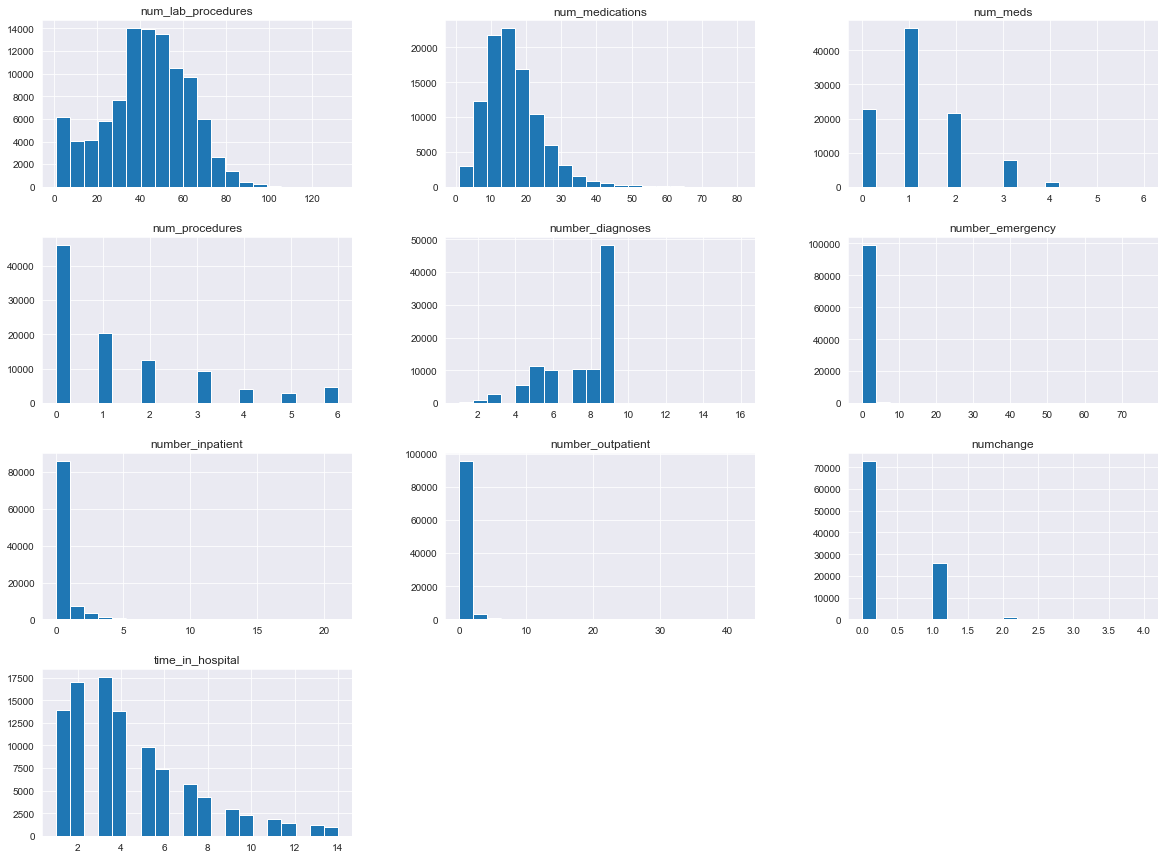

In [362]:
df[num_col].hist(bins=20, figsize=(20,15))

In [363]:
# Removing skewnewss and kurtosis using log transformation if it is above a threshold value (2)

statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = num_col
skew_before = []
skew_after = []

kurt_before = []
kurt_after = []

standard_deviation_before = []
standard_deviation_after = []

log_transform_needed = []

log_type = []

for i in num_col:
    skewval = df[i].skew()
    skew_before.append(skewval)
    
    kurtval = df[i].kurtosis()
    kurt_before.append(kurtval)
    
    sdval = df[i].std()
    standard_deviation_before.append(sdval)
    
    if (abs(skewval) >2) & (abs(kurtval) >2):
        log_transform_needed.append('Yes')
        
        if len(df[df[i] == 0])/len(df) <=0.02:
            log_type.append('log')
            skewvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).skew()
            skew_after.append(skewvalnew)
            
            kurtvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
        else:
            log_type.append('log1p')
            skewvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).skew()
            skew_after.append(skewvalnew)
        
            kurtvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
    else:
        log_type.append('NA')
        log_transform_needed.append('No')
        
        skew_after.append(skewval)
        kurt_after.append(kurtval)
        standard_deviation_after.append(sdval)

statdataframe['skew_before'] = skew_before
statdataframe['kurtosis_before'] = kurt_before
statdataframe['standard_deviation_before'] = standard_deviation_before
statdataframe['log_transform_needed'] = log_transform_needed
statdataframe['log_type'] = log_type
statdataframe['skew_after'] = skew_after
statdataframe['kurtosis_after'] = kurt_after
statdataframe['standard_deviation_after'] = standard_deviation_after

statdataframe

,numeric_column,skew_before,kurtosis_before,standard_deviation_before,log_transform_needed,log_type,skew_after,kurtosis_after,standard_deviation_after
0,num_meds,0.675076,0.277145,0.921624,No,NA,0.675076,0.277145,0.921624
1,time_in_hospital,1.137872,0.871039,2.974540,No,NA,1.137872,0.871039,2.974540
2,number_emergency,22.842671,1185.290350,0.935499,Yes,log1p,3.661151,16.277409,0.315400
3,number_inpatient,3.626462,20.834272,1.261805,Yes,log1p,1.450515,1.405464,0.510427
4,number_outpatient,8.818456,148.563977,1.263950,Yes,log1p,2.733988,7.804687,0.429386
5,num_procedures,1.325966,0.890611,1.700343,No,NA,1.325966,0.890611,1.700343
6,number_diagnoses,-0.867698,-0.109256,1.938238,No,NA,-0.867698,-0.109256,1.938238
7,num_lab_procedures,-0.241523,-0.253166,19.620723,No,NA,-0.241523,-0.253166,19.620723
8,num_medications,1.333006,3.523438,8.092553,No,NA,1.333006,3.523438,8.092553
9,numchange,1.425372,1.433812,0.487852,No,NA,1.425372,1.433812,0.487852


In [364]:
# log transformation for the columns determined to be needing it above.

for i in range(len(statdataframe)):
    if statdataframe['log_transform_needed'][i] == 'Yes':
        colname = str(statdataframe['numeric_column'][i])
        
        if statdataframe['log_type'][i] == 'log':
            df = df[df[colname] > 0]
            df[colname + "_log"] = np.log(df[colname])
            
        elif statdataframe['log_type'][i] == 'log1p':
            df = df[df[colname] >= 0]
            df[colname + "_log1p"] = np.log1p(df[colname])

 Title: number_emergency
 Before Log Transformartion

 mu = 0.20 and sigma = 0.94



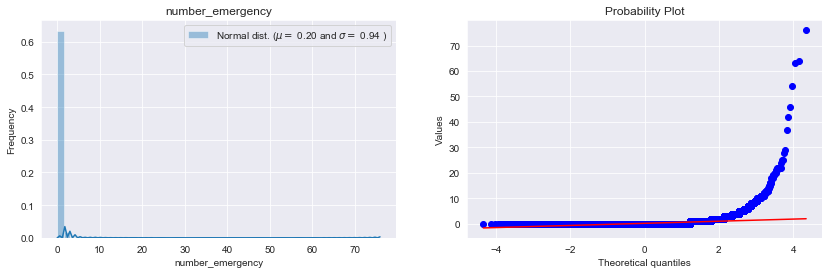

After Log Transformation

 mu = 0.10 and sigma = 0.32



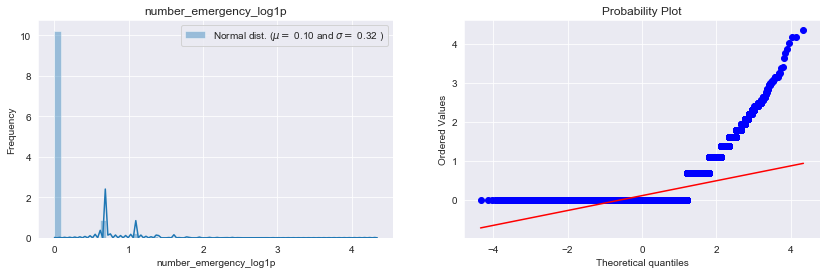

 Title: number_inpatient
 Before Log Transformartion

 mu = 0.63 and sigma = 1.26



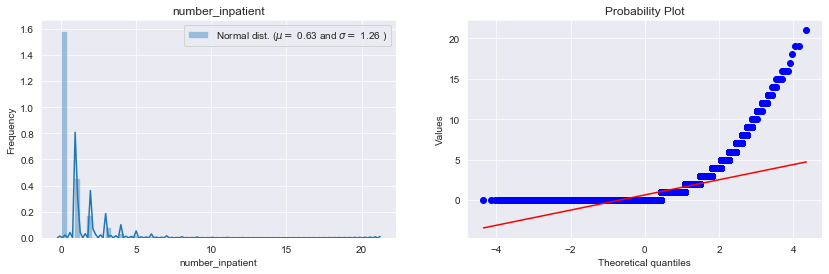

After Log Transformation

 mu = 0.32 and sigma = 0.51



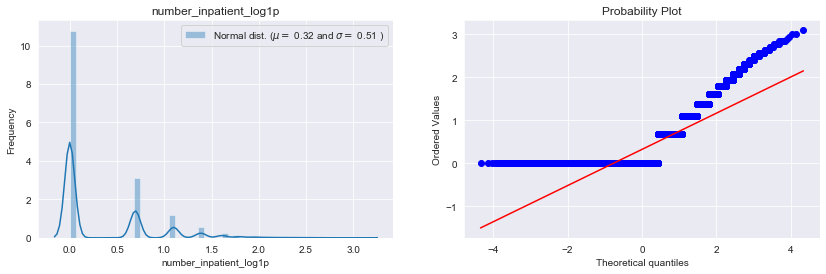

 Title: number_outpatient
 Before Log Transformartion

 mu = 0.37 and sigma = 1.26



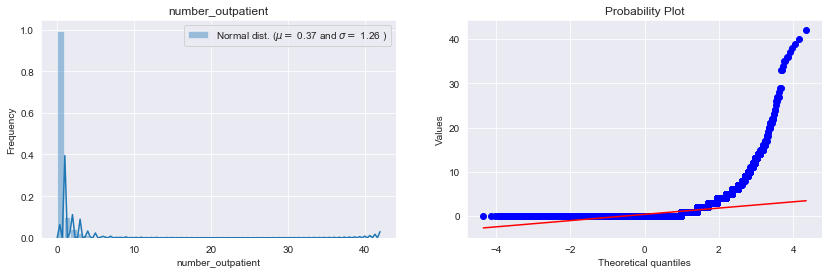

After Log Transformation

 mu = 0.17 and sigma = 0.43



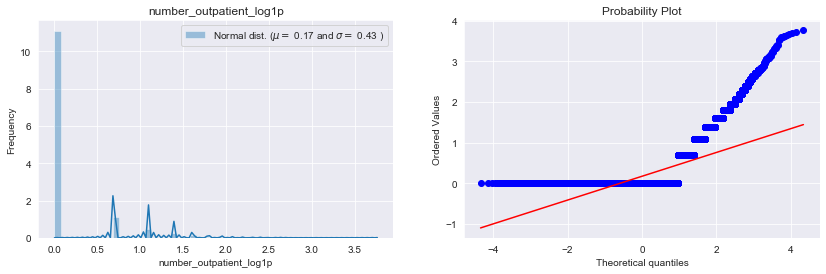

In [365]:
transform =['number_emergency','number_inpatient', 'number_outpatient']
Log_transform= ['number_emergency_log1p','number_inpatient_log1p', 'number_outpatient_log1p']

for i in range(0,3):
    print (" Title: %s" % transform[i])
    print (" Before Log Transformartion")
    fig, (ax1, ax2) =plt.subplots(1, 2, figsize=(14, 4))

    sns.distplot(df[transform[i]], ax = ax1)

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(df[transform[i]])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    #Plot the distribution
    ax1.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
    ax1.set_ylabel('Frequency')
    ax1.set_title(transform[i])

    #Get also the QQ-plot
    ax2 = plt.subplot(122)
    res = stats.probplot(df[transform[i]], plot=plt)
    ax2.set_ylabel('Values')
    plt.show()
    
    print( "After Log Transformation")
    
    fig, (ax1, ax2) =plt.subplots(1, 2, figsize=(14,4))

    sns.distplot(df[Log_transform[i]], ax = ax1)

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(df[Log_transform[i]])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    #Plot the distribution
    ax1.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
    ax1.set_ylabel('Frequency')
    ax1.set_title(Log_transform[i])

    #Get also the QQ-plot
    ax2 = plt.subplot(122)
    res = stats.probplot(df[Log_transform[i]], plot=plt)
    plt.show()
    



In [366]:
df.dtypes

encounter_id                  int64
patient_nbr                   int64
race                         object
gender                        int32
age                           int32
admission_type_id             int32
discharge_disposition_id      int32
admission_source_id           int32
time_in_hospital              int64
payer_code                   object
medical_specialty            object
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                      float64
diag_2                      float64
diag_3                      float64
number_diagnoses              int64
max_glu_serum                 int32
A1Cresult                     int32
metformin                     int32
repaglinide                   int32
nateglinide                   int32
chlorpropamide                int32
glimepiride                 

In [367]:
df.shape

(100124, 53)

## 8) Standardization

In [368]:
numeric=num_col+['number_emergency_log1p','number_inpatient_log1p', 'number_outpatient_log1p']

In [369]:
num_col=list(set(num_col)-{'change','readmitted'})

In [370]:
# Logical order: duplicate removal, then outlier removal followed by scaling
# dropping multiple encounters while keeping either first or last encounter of these patients
df2 = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df2.shape

(70446, 53)

In [371]:
# standardize function
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

In [372]:
df2[numeric] = standardize(df2[numeric])
import scipy.stats as sp
df2 = df2[(np.abs(sp.zscore(df2[numeric])) < 3).all(axis=1)]

In [373]:
import seaborn as sns
from matplotlib.colors import ListedColormap

my_cmap = ListedColormap(sns.light_palette((250, 100, 50), input="husl", n_colors=50).as_hex())
# drop some columns due to their means is round to 0
#table = df.drop(['acetohexamide','tolbutamide', 'troglitazone', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone','patient_nbr', 'encounter_id', 'service_utilization_log1p'], axis = 1).corr(method='pearson')
table = df2.drop(['patient_nbr', 'encounter_id'], axis=1).corr(method='pearson')
table.style.background_gradient(cmap=my_cmap, axis = 0)

In [381]:
pd.options.display.max_rows = 400

c = df2.corr().abs()
s = c.unstack()
print(s.shape)
so = s.sort_values(ascending=False)

so[45:500]

(2401,)


encounter_id              encounter_id                1.000000
number_emergency          number_emergency_log1p      1.000000
number_emergency_log1p    number_emergency            1.000000
number_outpatient         number_outpatient_log1p     0.992777
number_outpatient_log1p   number_outpatient           0.992777
number_inpatient          number_inpatient_log1p      0.992090
number_inpatient_log1p    number_inpatient            0.992090
num_meds                  diabetesMed                 0.746414
diabetesMed               num_meds                    0.746414
change                    num_meds                    0.742692
num_meds                  change                      0.742692
numchange                 change                      0.622802
change                    numchange                   0.622802
diabetesMed               insulin                     0.575091
insulin                   diabetesMed                 0.575091
encounter_id              patient_nbr                 0

In [383]:
df2.dtypes

encounter_id                  int64
patient_nbr                   int64
race                         object
gender                        int32
age                           int32
admission_type_id             int32
discharge_disposition_id      int32
admission_source_id           int32
time_in_hospital            float64
payer_code                   object
medical_specialty            object
num_lab_procedures          float64
num_procedures              float64
num_medications             float64
number_outpatient           float64
number_emergency            float64
number_inpatient            float64
diag_1                      float64
diag_2                      float64
diag_3                      float64
number_diagnoses            float64
max_glu_serum                 int32
A1Cresult                     int32
metformin                     int32
repaglinide                   int32
nateglinide                   int32
chlorpropamide                int32
glimepiride                 

## 9) Dummyfication

In [422]:
df2['diag_1'] = df2['diag_1'].astype('object')
df_pd = pd.get_dummies(df2, columns=['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
                                      'admission_source_id', 'max_glu_serum', 'A1Cresult', 'diag_1','payer_code','medical_specialty'])

non_num_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'max_glu_serum', 'A1Cresult', 'diag_1','payer_code','medical_specialty' ]

In [423]:
num_cols = list(set(list(df._get_numeric_data().columns))- {'readmitted', 'change','IsTrain'})
num_cols

['num_meds',
 'diabetesMed',
 'admission_type_id',
 'pioglitazone',
 'number_emergency',
 'number_diagnoses',
 'A1Cresult',
 'max_glu_serum',
 'repaglinide',
 'age',
 'chlorpropamide',
 'discharge_disposition_id',
 'numchange',
 'time_in_hospital',
 'tolazamide',
 'insulin',
 'glipizide-metformin',
 'metformin-rosiglitazone',
 'acetohexamide',
 'number_inpatient_log1p',
 'number_outpatient',
 'troglitazone',
 'tolbutamide',
 'encounter_id',
 'diag_3',
 'diag_2',
 'acarbose',
 'number_emergency_log1p',
 'nateglinide',
 'num_lab_procedures',
 'glimepiride-pioglitazone',
 'num_medications',
 'patient_nbr',
 'rosiglitazone',
 'miglitol',
 'glyburide-metformin',
 'glimepiride',
 'number_inpatient',
 'num_procedures',
 'metformin',
 'admission_source_id',
 'gender',
 'metformin-pioglitazone',
 'glipizide',
 'glyburide',
 'number_outpatient_log1p',
 'diag_1']

In [436]:
new_non_num_cols = []
for i in non_num_cols:
    for j in df_pd.columns:
        if i in j:
            new_non_num_cols.append(j)

# new_non_num_cols
new_non_num_cols

['race_-99',
 'race_AfricanAmerican',
 'race_Asian',
 'race_Caucasian',
 'race_Hispanic',
 'race_Other',
 'gender_-99',
 'gender_0',
 'gender_1',
 'admission_type_id_1',
 'admission_type_id_2',
 'admission_type_id_3',
 'admission_type_id_4',
 'admission_type_id_5',
 'admission_type_id_6',
 'admission_type_id_7',
 'admission_type_id_8',
 'discharge_disposition_id_1',
 'discharge_disposition_id_7',
 'discharge_disposition_id_9',
 'discharge_disposition_id_12',
 'discharge_disposition_id_13',
 'discharge_disposition_id_18',
 'discharge_disposition_id_19',
 'admission_source_id_1',
 'admission_source_id_4',
 'admission_source_id_7',
 'admission_source_id_8',
 'admission_source_id_9',
 'admission_source_id_11',
 'admission_source_id_13',
 'max_glu_serum_-99',
 'max_glu_serum_0',
 'max_glu_serum_1',
 'A1Cresult_-99',
 'A1Cresult_0',
 'A1Cresult_1',
 'diag_1_0.0',
 'diag_1_1.0',
 'diag_1_2.0',
 'diag_1_3.0',
 'diag_1_4.0',
 'diag_1_5.0',
 'diag_1_6.0',
 'diag_1_7.0',
 'diag_1_8.0',
 'payer_co

In [437]:
new_non_num_cols = []
for i in Dummy_col:
    for j in df_pd.columns:
        if i in j:
            new_non_num_cols.append(j)

# new_non_num_cols
new_non_num_cols

['diag_1_0.0',
 'diag_1_1.0',
 'diag_1_2.0',
 'diag_1_3.0',
 'diag_1_4.0',
 'diag_1_5.0',
 'diag_1_6.0',
 'diag_1_7.0',
 'diag_1_8.0',
 'diag_2',
 'diag_3',
 'gender_-99',
 'gender_0',
 'gender_1',
 'admission_type_id_1',
 'admission_type_id_2',
 'admission_type_id_3',
 'admission_type_id_4',
 'admission_type_id_5',
 'admission_type_id_6',
 'admission_type_id_7',
 'admission_type_id_8',
 'discharge_disposition_id_1',
 'discharge_disposition_id_7',
 'discharge_disposition_id_9',
 'discharge_disposition_id_12',
 'discharge_disposition_id_13',
 'discharge_disposition_id_18',
 'discharge_disposition_id_19',
 'admission_source_id_1',
 'admission_source_id_4',
 'admission_source_id_7',
 'admission_source_id_8',
 'admission_source_id_9',
 'admission_source_id_11',
 'admission_source_id_13',
 'max_glu_serum_-99',
 'max_glu_serum_0',
 'max_glu_serum_1',
 'A1Cresult_-99',
 'A1Cresult_0',
 'A1Cresult_1',
 'payer_code_-99',
 'payer_code_BC',
 'payer_code_CH',
 'payer_code_CM',
 'payer_code_CP',
 '

In [438]:
df_pd.IsTrain.value_counts()

1    56442
0     4938
Name: IsTrain, dtype: int64

In [433]:
df_train = df_pd[df_pd['IsTrain']=='1']
df_train.index = list(range(len(df_train)))

df_test = df_pd[df_pd['IsTrain']=='0']
df_test.index = list(range(len(df_test)))

In [434]:
df_train

,encounter_id,patient_nbr,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,medical_specialty_Surgery-Colon&Rectal,medical_specialty_Surgery-General,medical_specialty_Surgery-Maxillofacial,medical_specialty_Surgery-Neuro,medical_specialty_Surgery-Pediatric,medical_specialty_Surgery-Plastic,medical_specialty_Surgery-Thoracic,medical_specialty_Surgery-Vascular,medical_specialty_SurgicalSpecialty,medical_specialty_Urology
0,7733208,3291489,65,-0.779133,0.40380,0.914481,-0.575502,-0.272304,-0.190688,-0.403034,...,0,0,0,0,0,0,0,0,0,0
1,152449578,84529188,45,-0.441609,2.17095,-0.233669,-0.090519,0.608850,-0.190688,0.802730,...,0,0,0,0,0,0,0,0,0,0
2,440311646,121372727,45,2.933629,2.27193,2.062630,2.213153,-0.272304,-0.190688,-0.403034,...,0,0,0,0,0,0,0,0,0,0
3,139779162,86645961,65,-0.441609,-1.06041,-0.807743,-0.575502,0.608850,-0.190688,2.008493,...,0,0,0,0,0,0,0,0,0,0
4,223277988,59559255,75,0.233439,1.26213,-0.233669,1.121940,-0.272304,1.327189,-0.403034,...,0,0,0,0,0,0,0,0,0,0
5,127005696,72034335,85,-0.104085,1.16115,1.488555,0.636956,0.608850,-0.190688,0.802730,...,0,0,0,0,0,0,1,0,0,0
6,37320456,23560803,65,0.570963,-1.31286,-0.807743,-0.817994,-0.272304,1.327189,-0.403034,...,0,0,0,0,0,0,0,0,0,0
7,144033276,6382269,55,-0.779133,-0.00012,2.636704,-0.333010,-0.272304,-0.190688,-0.403034,...,0,0,0,0,0,0,0,0,0,0
8,166008048,89445645,75,-0.779133,0.45429,0.914481,-0.333010,0.608850,-0.190688,-0.403034,...,0,0,0,0,0,0,0,0,0,0
9,255458850,84752271,55,-0.104085,2.01948,-0.807743,-0.333010,1.490004,-0.190688,0.802730,...,0,0,0,0,0,0,0,0,0,0


In [439]:
df_train.drop(['encounter_id','patient_nbr','IsTrain'], axis = 1, inplace = True)
df_test.drop(['encounter_id','patient_nbr','IsTrain'], axis = 1, inplace=True)

In [441]:
df_train.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_2,diag_3,...,medical_specialty_Surgery-Colon&Rectal,medical_specialty_Surgery-General,medical_specialty_Surgery-Maxillofacial,medical_specialty_Surgery-Neuro,medical_specialty_Surgery-Pediatric,medical_specialty_Surgery-Plastic,medical_specialty_Surgery-Thoracic,medical_specialty_Surgery-Vascular,medical_specialty_SurgicalSpecialty,medical_specialty_Urology
0,65,-0.779133,0.40380,0.914481,-0.575502,-0.272304,-0.190688,-0.403034,3.0,4.0,...,0,0,0,0,0,0,0,0,0,0
1,45,-0.441609,2.17095,-0.233669,-0.090519,0.608850,-0.190688,0.802730,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,45,2.933629,2.27193,2.062630,2.213153,-0.272304,-0.190688,-0.403034,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,65,-0.441609,-1.06041,-0.807743,-0.575502,0.608850,-0.190688,2.008493,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,75,0.233439,1.26213,-0.233669,1.121940,-0.272304,1.327189,-0.403034,7.0,1.0,...,0,0,0,0,0,0,0,0,0,0


## 10) Save to CSV -  df_train

In [ ]:
#### save final dataset to csv, split back into train and test data 
df_train.to_csv('df_train_preprocessed.csv', index=0)
df_test.to_csv('df_test_preprocessed.csv', index=0)
# no encounter or patient id